In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [2]:
file_path='C://Users//benar//OneDrive//Desktop//Machine Learning//datasets//Loan Prediction Problem//'
file_name='train.csv'

In [3]:
df=pd.read_csv(file_path+file_name)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(614, 13)

In [10]:
df['Credit_History']=df['Credit_History'].astype('object')

# Data Cleaning

## Handling Missing Values

In [11]:
df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes('object')

In [12]:
df_num=df_num.apply(lambda x:x.fillna(x.median()))

In [13]:
y=df['Loan_Status']

In [14]:
df_cat.drop(columns=['Loan_Status'],inplace=True)

In [15]:
df_cat=df_cat.apply(lambda x:x.fillna(x.mode()[0]))

In [16]:
df_num.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [17]:
df_cat.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
dtype: int64

# identifying and handling outliers

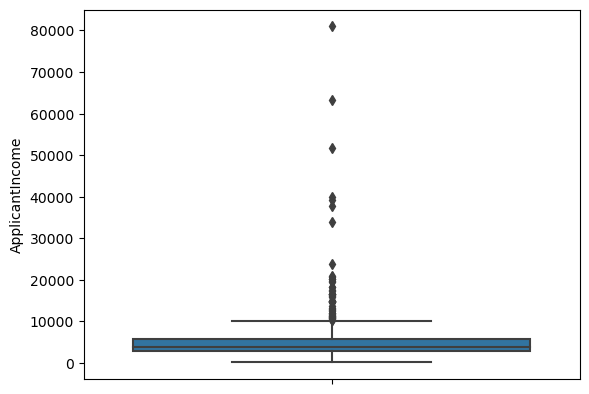

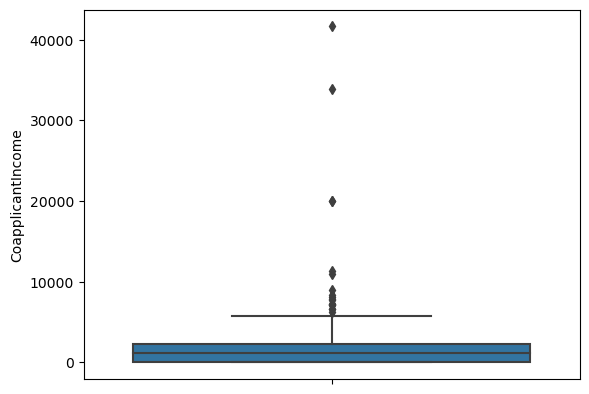

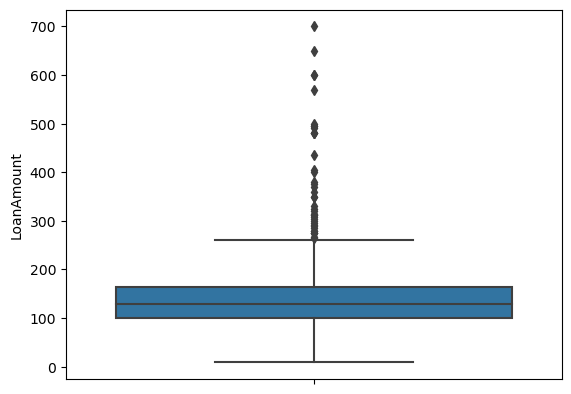

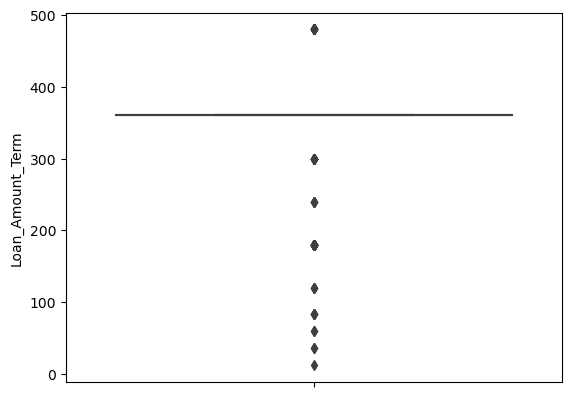

In [18]:
def func(i):
    sns.boxplot(data=df_num,y=i)
    plt.show()
for i in list(df_num.columns):
    func(i)

In [19]:
for i in list(df_num.columns):
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5*iqr
    df_num[i]=df_num[i].clip(lower=lc,upper=uc)

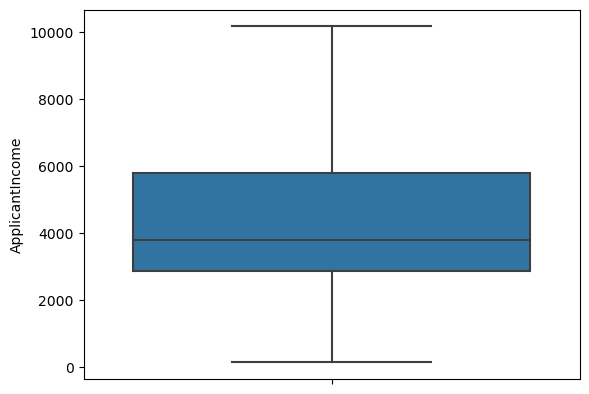

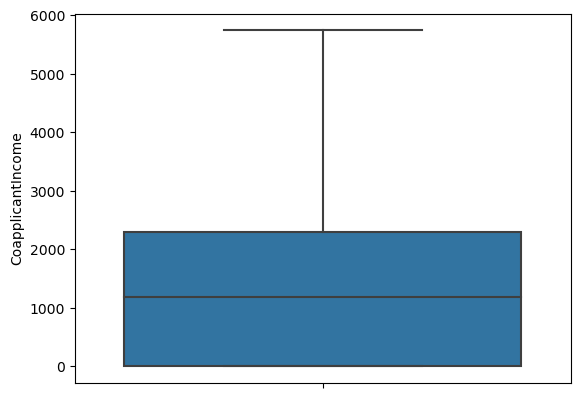

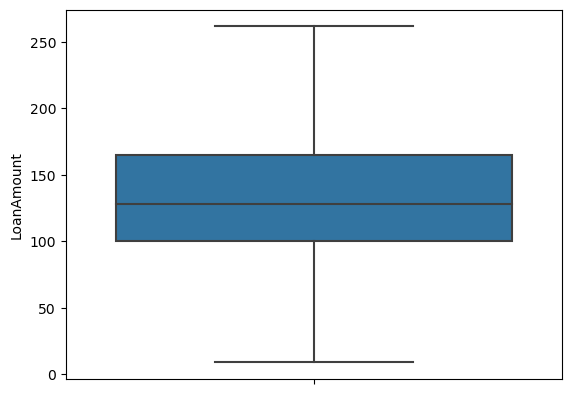

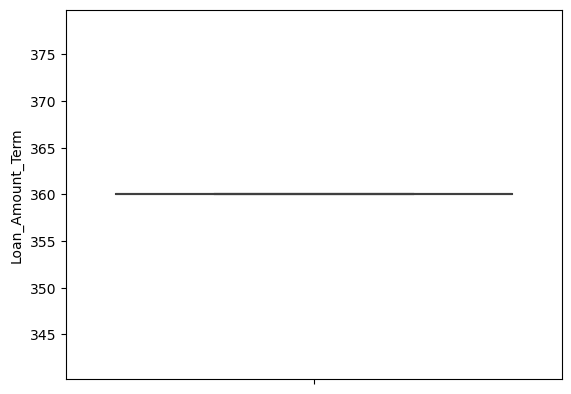

In [20]:
def func(i):
    sns.boxplot(data=df_num,y=i)
    plt.show()
for i in list(df_num.columns):
    func(i)

In [21]:
fin_df=pd.concat([df_num,df_cat,y],axis=1)

In [22]:
fin_df.shape

(614, 13)

In [23]:
fin_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Loan_ID            614 non-null    object 
 5   Gender             614 non-null    object 
 6   Married            614 non-null    object 
 7   Dependents         614 non-null    object 
 8   Education          614 non-null    object 
 9   Self_Employed      614 non-null    object 
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [25]:
fin_df=fin_df.drop(columns=['Loan_ID'])

In [26]:
y=fin_df['Loan_Status']
fin_df=fin_df.drop(columns=['Loan_Status'])

In [27]:
fin_df.shape

(614, 11)

# data visualisation

In [28]:
fin_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5849.0,0.0,128.0,360.0,Male,No,0,Graduate,No,1.0,Urban
1,4583.0,1508.0,128.0,360.0,Male,Yes,1,Graduate,No,1.0,Rural
2,3000.0,0.0,66.0,360.0,Male,Yes,0,Graduate,Yes,1.0,Urban
3,2583.0,2358.0,120.0,360.0,Male,Yes,0,Not Graduate,No,1.0,Urban
4,6000.0,0.0,141.0,360.0,Male,No,0,Graduate,No,1.0,Urban


### count of gender

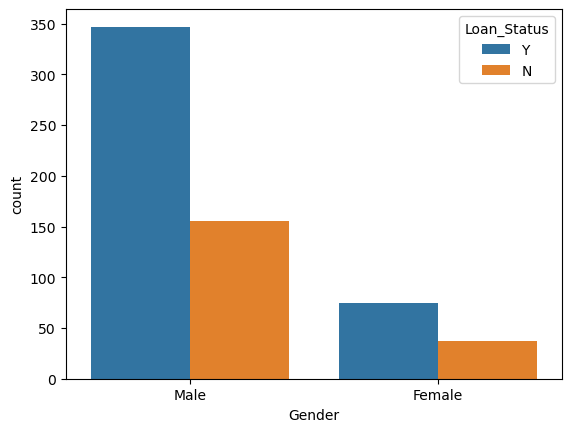

In [29]:
sns.countplot(data=fin_df,x='Gender',hue=y)
plt.show()

# comparing to total male and female each have almost same chance of getting loan,
# cannot make much conclusion from this feature

### Dependents plot

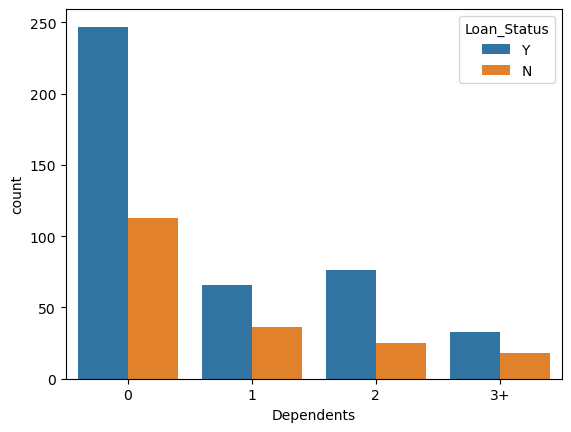

In [30]:
sns.countplot(data=fin_df,x='Dependents',hue=y)
plt.show()

#if you have not dependents then there is high chance of getting loan

### loan amount visualisation

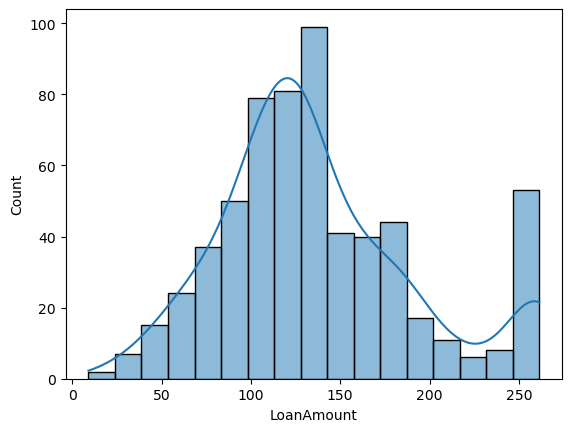

In [31]:
sns.histplot(data=fin_df,x='LoanAmount',kde=True)
plt.show()

#the loan amount data is normally distributed to an extent

### Married status plot

<Axes: xlabel='Married', ylabel='count'>

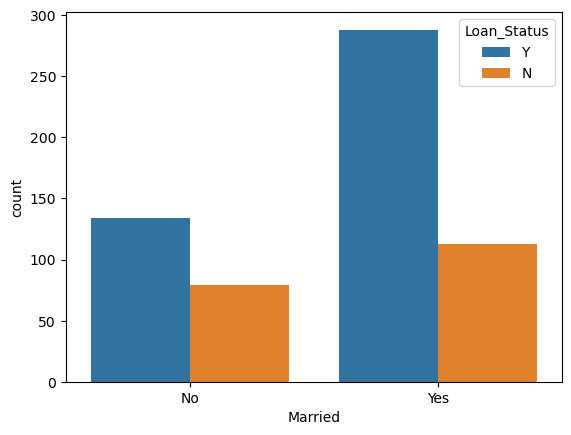

In [32]:
sns.countplot(data=fin_df,x='Married',hue=y)

#if you are married there is high chance of getting loan

### Education plot

<Axes: xlabel='Education', ylabel='count'>

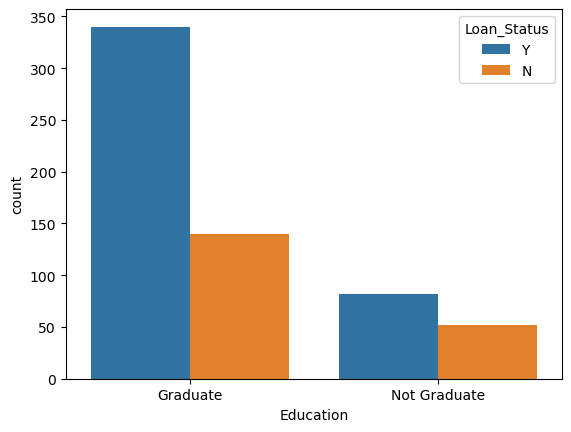

In [33]:
sns.countplot(data=fin_df,x='Education',hue=y)

# if you are graducated there will be high probability of getting loan 
# but the proportion of Y is also same for not graduate people comparing to total not graduate people

# Property Area Analysis

In [34]:
area_cnt=fin_df['Property_Area'].value_counts()
area_cnt

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

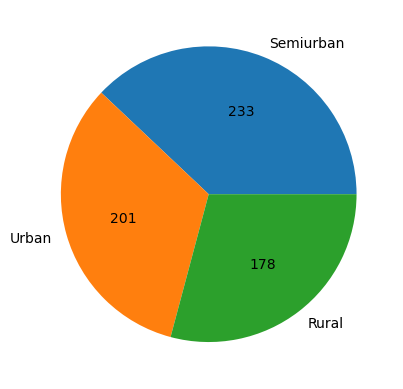

In [35]:
plt.pie(area_cnt,labels=area_cnt.index,autopct=lambda p: f'{int(p * sum(area_cnt) / 100)}')
plt.show()

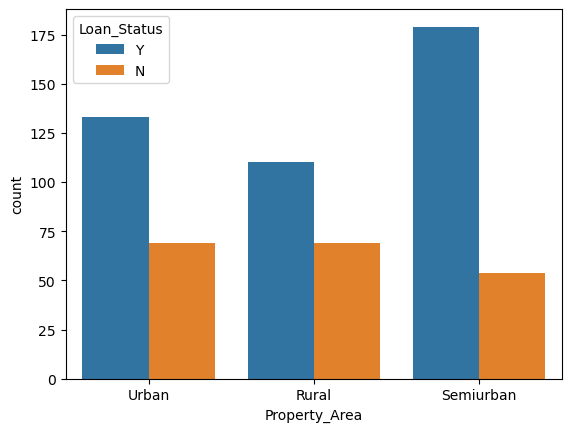

In [36]:
sns.countplot(data=fin_df,x='Property_Area',hue=y)
plt.show()

# we can see that most people from semi urban area got loan so if you are from semi urban 
# area you probability of getting loan is more

# Self Employed plot vs loan status

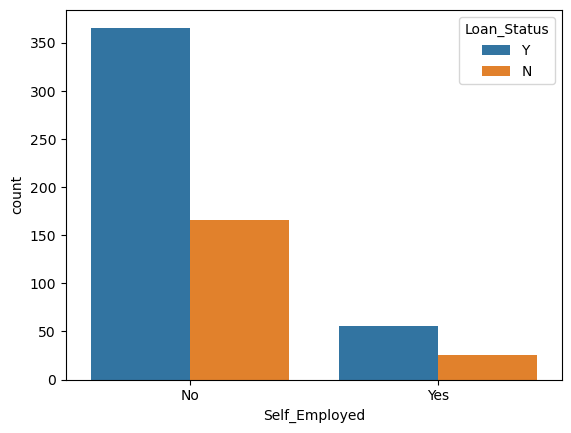

In [37]:
sns.countplot(data=fin_df,x='Self_Employed',hue=y)
plt.show()

# cannot find much important information from this feature

# Credit History vs Loan Status

<Axes: xlabel='Credit_History', ylabel='count'>

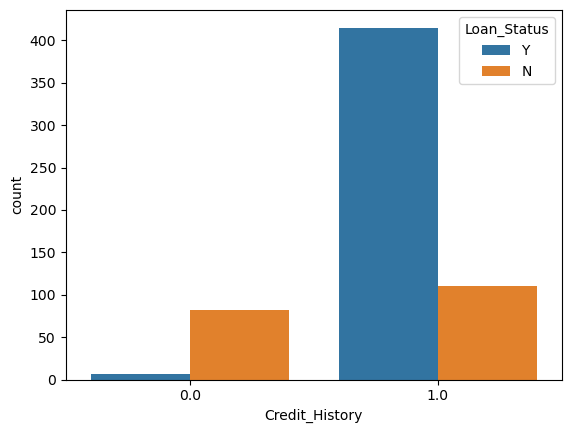

In [38]:
sns.countplot(data=fin_df,x='Credit_History',hue=y)

# if your credit history is 1 then you are having high chance of getting loan

# splitting data to train and test

In [39]:
x_train,x_test,y_train,y_test=train_test_split(fin_df,y,test_size=0.2,random_state=42,stratify=y)

# Data Preprocessing

In [40]:
num_df=fin_df.select_dtypes(['float64'])
cat_df=fin_df.select_dtypes(['object'])
num_cols=list(num_df.columns)
cat_cols=list(cat_df.columns)

In [41]:
x_train.shape

(491, 11)

In [42]:
x_test.shape

(123, 11)

In [43]:
y_train.shape

(491,)

In [44]:
y_test.shape

(123,)

# scaling numeric columns using standard scaler

In [45]:
scaler=StandardScaler()

In [46]:
scaler.fit(num_df)

StandardScaler()

In [47]:
x_train[num_cols]=scaler.transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])

# encoding categorical variables

In [48]:
cat_df=pd.get_dummies(x_train[cat_cols],drop_first=True)
cat_df.columns

Index(['Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [49]:
cat_test_df=pd.get_dummies(x_test[cat_cols],drop_first=True)
cat_test_df.columns

Index(['Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [50]:
x_train=pd.concat([x_train[num_cols],cat_df],axis=1)


In [51]:
x_test=pd.concat([x_test[num_cols],cat_test_df],axis=1)

In [52]:
x_train[x_train.select_dtypes(bool).columns]=x_train.select_dtypes(bool).astype(np.int32)

In [53]:
x_test[x_test.select_dtypes(bool).columns]=x_test.select_dtypes(bool).astype(np.int32)

# Creating a model

In [54]:
log_model=LogisticRegression().fit(x_train,y_train)

In [55]:
model_pred=log_model.predict(x_test)

In [56]:
accuracy_score(model_pred,y_test)

0.8536585365853658

In [57]:
confusion_matrix(model.predict(x_test),y_test)

NameError: name 'model' is not defined

## decision tree regressor

In [ ]:
DecisionTreeClassifier?

In [ ]:
dec_model=DecisionTreeClassifier(max_depth=6,random_state=42).fit(x_train,y_train)

In [ ]:
dec_model.tree_.max_depth

In [ ]:
accuracy_score(dec_model.predict(x_test),y_test)e

## random forest classifier

In [ ]:
ran_model=RandomForestClassifier(n_estimators=400).fit(x_train,y_train)

In [ ]:
accuracy_score(ran_model.predict(x_test),y_test)

In [ ]:
confusion_matrix(ran_model.predict(x_test),y_test)

## gradient boost classifer

In [ ]:
grad_model=GradientBoostingClassifier().fit(x_train,y_train)


In [ ]:
accuracy_score(grad_model.predict(x_test),y_test)

In [ ]:
confusion_matrix(grad_model.predict(x_test),y_test)